In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
import cymetric as cym
from cymetric import timeseries
import pandas as pd
import numpy as np
import sqlite3 as lite
import os
import sys 
sys.path.insert(0, '../../../../scripts/')
import output as oup
import functions as fn

In [9]:
starter_string = 'Cur'
scenario_nums = ['4','5','6','7','8','10']

In [10]:
output_start = '../../../../cyclus-files/oat/pyre/win-cur/cur'
cur_dict = {}
for x in range(len(scenario_nums)): 
    output_file = output_start + scenario_nums[x]+'.sqlite'
    cur_dict[scenario_nums[x]] = fn.get_cursor(output_file)

In [11]:
nucnum = [10030000,60140000,360860000,380900000,390900000,400950000,420950000,430990000,441010000,451030000,
461070000,471090000,521320000,531290000,541290000,551370000,561330000,571390000,581440000,591440000,601430000,
601450000,611470000,621470000,621490000,621500000,621510000,621520000,631530000,641550000,922340000,922350000,
922360000,922380000,932370000,942380000,942390000,942400000,942410000,942420000,952410000,952430000,962430000,
962440000,962450000]

In [12]:
dict_1 = {}
dict_2 = {}
dict_3 = {}
dict_4 = {}
dict_5 = {}
dict_6 = {}


for x in range(len(nucnum)):
    num = nucnum[x]
    dict_1 = fn.isotope_total_cum(cur_dict[scenario_nums[0]],num,dict_1)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_2 = fn.isotope_total_cum(cur_dict[scenario_nums[1]],num,dict_2)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_3 = fn.isotope_total_cum(cur_dict[scenario_nums[2]],num,dict_3)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_4 = fn.isotope_total_cum(cur_dict[scenario_nums[3]],num,dict_4)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_5 = fn.isotope_total_cum(cur_dict[scenario_nums[4]],num,dict_5)
    
for x in range(len(nucnum)):
    num = nucnum[x]
    dict_6 = fn.isotope_total_cum(cur_dict[scenario_nums[5]],num,dict_6)

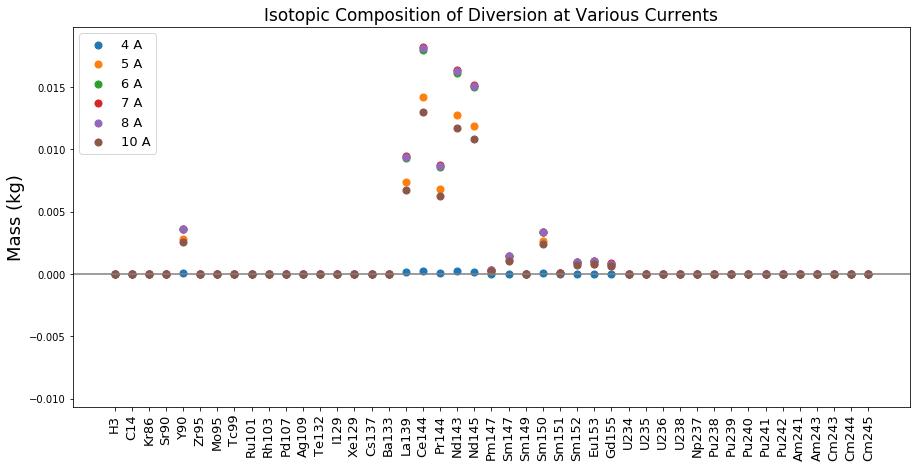

In [25]:
init_yr, init_month, duration, timestep = fn.get_timesteps(cur_dict[scenario_nums[0]])
key_list = list(dict_1.keys())
y_pos = np.arange(len(key_list))
w = 45
h = 6
stream_ = [[0 for x in range(w)] for y in range(h)]

z=1
n=0
for key in key_list:
    temp1 = list(dict_1[key])
    temp2 = list(dict_2[key])
    temp3 = list(dict_3[key])
    temp4 = list(dict_4[key])
    temp5 = list(dict_5[key])
    temp6 = list(dict_6[key])
    stream_[0][n] = temp1[z]
    stream_[1][n] = temp2[z]
    stream_[2][n] = temp3[z]
    stream_[3][n] = temp4[z]
    stream_[4][n] = temp5[z]
    stream_[5][n] = temp6[z]
    n = n+1
    
name_list = ['H3','C14','Kr86','Sr90','Y90','Zr95','Mo95','Tc99','Ru101','Rh103',
             'Pd107','Ag109','Te132','I129','Xe129','Cs137','Ba133','La139','Ce144',
             'Pr144','Nd143','Nd145','Pm147','Sm147','Sm149','Sm150','Sm151','Sm152',
             'Eu153','Gd155','U234','U235','U236','U238','Np237','Pu238','Pu239',
             'Pu240','Pu241','Pu242','Am241','Am243','Cm243','Cm244','Cm245']    
    
#plt.scatter(range(1,46),stream_[0])  

fig, ax = plt.subplots(figsize=(15,7))
plt.axhline(y=0,color='grey')
ax.scatter(range(0,45),stream_[0], label='4 A', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[1], label='5 A', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[2], label='6 A', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[3], label='7 A', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[4], label='8 A', marker = "o", s = 50)
ax.scatter(range(0,45),stream_[5], label='10 A', marker = "o", s = 50)
box = ax.get_position()
ax.set_position([box.x0,box.y0 + box.height,box.width,box.height*1])
handles, labels = ax.get_legend_handles_labels()
plt.xticks(y_pos,name_list,rotation=90,fontsize=13)
ax.legend(handles, labels, fontsize=13,loc='upper left',fancybox=True)
ax.set_ylabel('Mass (kg)', fontsize=18)
ax.set_title('Isotopic Composition of Diversion at Various Currents' , fontsize=17)
plt.savefig('current-sa-comp.png', bbox_inches="tight")

In [35]:
diff_ = [[0 for x in range(w)] for y in range(h)]
percent_ = [[0 for x in range(w)] for y in range(h)]

#for i in range(len(key_list)):
#    diff_[0][i] = stream_[0][i] - stream_[5][i]
#    diff_[1][i] = stream_[1][i] - stream_[5][i]
#    diff_[2][i] = stream_[2][i] - stream_[5][i]
#    diff_[3][i] = stream_[3][i] - stream_[5][i]
#    diff_[4][i] = stream_[4][i] - stream_[5][i]

for x in range(1,6):
    for y in range(len(key_list)):
        tmp = stream_[x][y] - stream_[0][y]
        if tmp == 0:
            diff_[x][y] = tmp
        else:
            n = x-1
            diff_[x][y] = tmp * 1000
            percent_[n][y] = (tmp / stream_[0][y]) * 100
            
print(percent_)

[[0, 0, 0, 0, 5684.263959394184, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5684.263959394185, 5684.263959394184, 5684.263959394186, 5684.263959394186, 5684.263959394184, 5684.263959394185, 5684.263959394184, 5684.263959394186, 5684.263959394186, 5684.263959394184, 5684.263959394184, 5684.263959394184, 5684.263959394186, 0, 0, 0, 0, 5684.263959394185, 5684.263959394183, 5684.263959394184, 5684.263959394183, 5684.263959394183, 5684.263959394186, 5684.263959394184, 5684.263959394185, 5684.263959394186, 5684.263959394185, 5684.263959394183], [0, 0, 0, 0, 7216.2436548265705, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7216.243654826571, 7216.2436548265705, 7216.243654826569, 7216.2436548265705, 7216.243654826569, 7216.2436548265705, 7216.2436548265705, 7216.2436548265705, 7216.2436548265705, 7216.2436548265705, 7216.243654826571, 7216.2436548265705, 7216.2436548265705, 0, 0, 0, 0, 7216.243654826569, 7216.243654826571, 7216.2436548265705, 7216.2436548265705, 7216.2436548265705, 7216.2436548265705, 7216.24

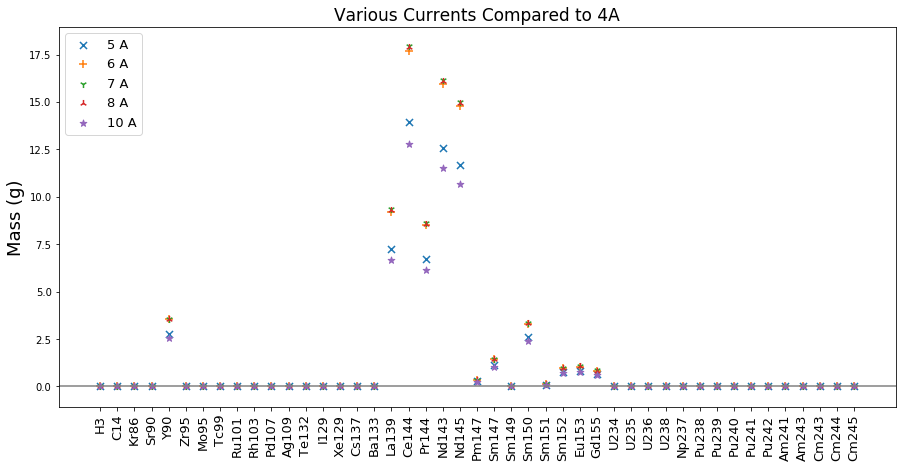

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
plt.axhline(y=0,color='grey')
ax.scatter(range(0,45),diff_[1], label='5 A', marker = "x", s = 50)
ax.scatter(range(0,45),diff_[2], label='6 A', marker = "+", s = 50)
ax.scatter(range(0,45),diff_[3], label='7 A', marker = "1", s = 50)
ax.scatter(range(0,45),diff_[4], label='8 A', marker = "2", s = 50)
ax.scatter(range(0,45),diff_[5], label='10 A', marker = "*", s = 50)
box = ax.get_position()
ax.set_position([box.x0,box.y0 + box.height,box.width,box.height*1])
handles, labels = ax.get_legend_handles_labels()
plt.xticks(y_pos,name_list,rotation=90,fontsize=13)
ax.legend(handles, labels, fontsize=13,loc='upper left',fancybox=True)
ax.set_ylabel('Mass (g)', fontsize=18)
ax.set_title('Various Currents Compared to 4A' , fontsize=17)
plt.savefig('current-sa-diff.png', bbox_inches="tight")